# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [20]:
import numpy as np
import pylab as plt
import swyft
import torch

In [41]:
DEVICE = 'cuda:0'
NDIM = 1  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds
N_TRAIN = 3000
N_BATCH = 3

In [42]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.1):
    z = (z-0.5)*4
    x = np.sin(z)
    n = np.random.randn(*x.shape)*sigma    
    return x + n

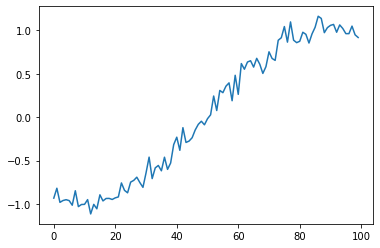

In [43]:
z = np.linspace(0, 1, 100)
z = z.repeat(2).reshape(100,2)
x = [model(z0)[0] for z0 in z]
plt.plot(x)

In [44]:
z0 = np.ones(NDIM)*0.5
x0 = model(z0, sigma = 1e-6)
x0

array([-1.63987196e-06])

In [45]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [46]:
for i in range(NROUNDS):
    sw.round(n_sims = 100, n_train = [N_TRAIN, N_TRAIN, N_TRAIN], lr = [1e-3, 1e-4, 1e-5], n_batch = N_BATCH)

  0%|          | 0/3000 [00:00<?, ?it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)
Network optimization


100%|██████████| 3000/3000 [01:49<00:00, 27.38it/s]


In [47]:
post = sw.get_posteriors(nround=0)
post_err = sw.get_posteriors(nround=0, error = True)

Estimating std: 100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


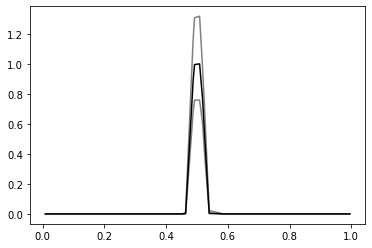

In [48]:
plt.plot(post[0]['z'], np.exp(post[0]['lnL'] + post_err[0]), color = '0.5')
plt.plot(post[0]['z'], np.exp(post[0]['lnL'] - post_err[0]), color = '0.5')
plt.plot(post[0]['z'], np.exp(post[0]['lnL']), color= 'k')

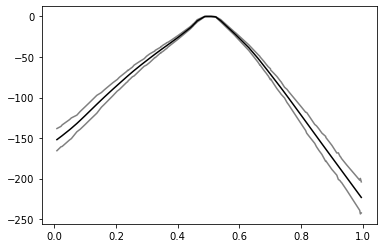

In [49]:
plt.plot(post[0]['z'], post[0]['lnL'] + post_err[0], color = '0.5')
plt.plot(post[0]['z'], post[0]['lnL'] - post_err[0], color = '0.5')
plt.plot(post[0]['z'], post[0]['lnL'], color= 'k')